In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 14.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 50.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 36.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 111.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 23.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 53.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 94.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from ultralytics import YOLO
from ultralytics.data.converter import convert_coco
import json
import os
import re

In [2]:
from pycocotools.coco import COCO
data_source = COCO(annotation_file='./datasets/TACO/annotations.json')

img_ids = data_source.getImgIds()

catIds = data_source.getCatIds()
categories = data_source.loadCats(catIds)
categories.sort(key=lambda x: x['id'])
classes = {}
coco_labels = {}
coco_labels_inverse = {}
for c in categories:
    coco_labels[len(classes)] = c['id']
    coco_labels_inverse[c['id']] = len(classes)
    classes[c['name']] = len(classes)

class_num = {}
print(classes)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
{'Aluminium foil': 0, 'Battery': 1, 'Aluminium blister pack': 2, 'Carded blister pack': 3, 'Other plastic bottle': 4, 'Clear plastic bottle': 5, 'Glass bottle': 6, 'Plastic bottle cap': 7, 'Metal bottle cap': 8, 'Broken glass': 9, 'Food Can': 10, 'Aerosol': 11, 'Drink can': 12, 'Toilet tube': 13, 'Other carton': 14, 'Egg carton': 15, 'Drink carton': 16, 'Corrugated carton': 17, 'Meal carton': 18, 'Pizza box': 19, 'Paper cup': 20, 'Disposable plastic cup': 21, 'Foam cup': 22, 'Glass cup': 23, 'Other plastic cup': 24, 'Food waste': 25, 'Glass jar': 26, 'Plastic lid': 27, 'Metal lid': 28, 'Other plastic': 29, 'Magazine paper': 30, 'Tissues': 31, 'Wrapping paper': 32, 'Normal paper': 33, 'Paper bag': 34, 'Plastified paper bag': 35, 'Plastic film': 36, 'Six pack rings': 37, 'Garbage bag': 38, 'Other plastic wrapper': 39, 'Single-use carrier bag': 40, 'Polypropylene bag': 41, 'Crisp packet': 42, 'Spread tub': 

In [3]:
# Model Training
# model = YOLO("yolo11m-seg.pt")
# model.train(
#     data="./m_data.yaml",
#     epochs=100,
#     patience=10,
#     batch=1,
#     imgsz=860,
# )

model = YOLO("yolo11m-seg.pt")
model.train(
    data="./new_data.yaml",
    epochs=100,
    patience=10,
    batch=-1,
    imgsz=640,
    lr0=0.001,
    optimizer='SGD',
    cos_lr=True,
)

# model = YOLO("runs/detect/train16/weights/best.pt")
# model.train(
#     data="./waste.yaml",
#     epochs=100,
#     patience=10,
#     batch=8,
#     lr0=0.001,
#     imgsz=860,
# )

100%|██████████| 43.3M/43.3M [00:00<00:00, 69.5MB/s]


New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.20 🚀 Python-3.9.18 torch-2.5.0+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=./new_data.yaml, epochs=100, time=None, patience=10, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

RuntimeError: Dataset 'new_data.yaml' error ❌ './new_data.yaml' does not exist

In [20]:
model.val()

Ultralytics 8.3.20 🚀 Python-3.9.18 torch-2.5.0+cu124 CUDA:0 (Tesla V100-SXM2-16GB, 16144MiB)
YOLO11m summary (fused): 303 layers, 20,076,292 parameters, 58,740 gradients, 67.9 GFLOPs


val: Scanning /mnt/aiongpfs/users/lweber/trash_detector/datasets/taco2/valid/labels.cache... 151 images, 149 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/19 [00:00<00:12,  1.49it/s]Exception in thread Thread-205:
Traceback (most recent call last):
  File "/home/users/lweber/miniconda3/envs/myenv/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/home/users/lweber/miniconda3/envs/myenv/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/home/users/lweber/miniconda3/envs/myenv/lib/python3.9/site-packages/ultralytics/utils/plotting.py", line 1125, in plot_images
    annotator.im.save(fname)  # save
  File "/home/users/lweber/miniconda3/envs/myenv/lib/python3.9/site-packages/PIL/Image.py", line 2439, in save
    save_handler(self, fp, filename)
  File "/home/users/lweber/miniconda3/

                   all        300        544      0.368     0.0181     0.0101    0.00593
               Battery          2          2          0          0          0          0
   Carded blister pack          3          3          0          0          0          0
  Clear plastic bottle          3         16          1          0          0          0
    Plastic bottle cap         21         82          0          0     0.0031    0.00217
      Metal bottle cap         28         36          0          0   0.000962   0.000398
          Broken glass          4          8       0.16       0.25      0.179     0.0561
              Food Can          4          6          1          0          0          0
               Aerosol          4          4          0          0          0          0
             Drink can         11         12          0          0          0          0
           Toilet tube         15         30          0          0          0          0
          Other carto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 28, 29, 30, 31, 34, 35, 36, 39, 40, 42, 43, 44, 46, 47, 48, 50, 54, 55, 56, 57, 58, 59])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ffe10ed2550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,   


image 1/1 /mnt/aiongpfs/users/lweber/trash_detector/test_data/image2.png: 480x640 (no detections), 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


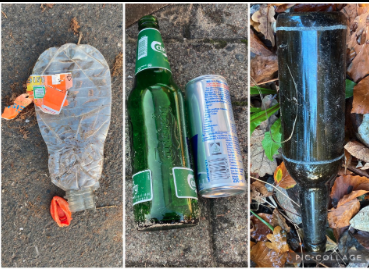

In [5]:
model = YOLO("runs/detect/train10/weights/best.pt")

results = model.predict("./test_data/image2.png")

from PIL import Image
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

In [25]:
labels_dir = "./datasets/taconet/train/labels"
images_dir = "./datasets/taconet/train/images"

background_images = []

for label_file in os.listdir(labels_dir):
    if os.path.getsize(os.path.join(labels_dir, label_file)) == 0:
        image_file = os.path.splitext(label_file)[0] + ".jpg"  # Adjust extension if needed
        background_images.append(os.path.join(images_dir, image_file))

print(f"Found {len(background_images)} background images")

Found 0 background images
